<a href="https://colab.research.google.com/github/Ro-netizen004/GradAdmissionPredictor/blob/main/Admission_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mohansacharya/graduate-admissions")

Skipping, found downloaded files in "./graduate-admissions" (use force=True to force download)


In [20]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Define the file path to the dataset (this path works in Google Colab or Jupyter if the file is in the specified directory)
file_path = "/content/graduate-admissions/Admission_Predict_Ver1.1.csv"

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame to get a quick look at the data
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [21]:
# Create feature matrix X by dropping the target column "Chance of Admit " from the DataFrame
X = df.drop("Chance of Admit ", axis=1)

# Create target vector Y by selecting the "Chance of Admit " column
Y = df["Chance of Admit "]

# Display the features (X) and target (Y) to verify the split
X, Y

(     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
 0             1        337          118                  4  4.5   4.5  9.65   
 1             2        324          107                  4  4.0   4.5  8.87   
 2             3        316          104                  3  3.0   3.5  8.00   
 3             4        322          110                  3  3.5   2.5  8.67   
 4             5        314          103                  2  2.0   3.0  8.21   
 ..          ...        ...          ...                ...  ...   ...   ...   
 495         496        332          108                  5  4.5   4.0  9.02   
 496         497        337          117                  5  5.0   5.0  9.87   
 497         498        330          120                  5  4.5   5.0  9.56   
 498         499        312          103                  4  4.0   5.0  8.43   
 499         500        327          113                  4  4.5   4.5  9.04   
 
      Research  
 0           1  
 1  

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)
y_pred

array([0.92671922, 0.77892806, 0.58584082, 0.70033329, 0.80448871,
       0.87586753, 0.48485782, 0.63648523, 0.80460912, 0.82275197,
       0.70344257, 0.72349461, 0.67134179, 0.92329979, 0.83506125,
       0.51923199, 0.86176246, 0.57346908, 0.53804446, 0.58000969,
       0.68193201, 0.5729244 , 0.72311442, 0.8036031 , 0.7663601 ,
       0.6204863 , 0.97205143, 0.84589389, 0.61484912, 0.75132286,
       0.57797234, 0.74074559, 0.56592273, 0.85345827, 0.63391827,
       0.74358402, 0.5654231 , 0.94281869, 0.6378805 , 0.69584915,
       0.98183147, 0.55758694, 0.68671005, 0.85348383, 0.92207356,
       0.56286619, 0.93783368, 0.81694811, 0.80861489, 0.90646329,
       0.87093318, 0.55607175, 0.6939115 , 0.53761435, 0.94962498,
       0.5826588 , 0.94844479, 0.72263978, 0.65694239, 0.48493317,
       0.64803091, 0.67586289, 0.60396804, 0.61893602, 0.42228723,
       0.57522282, 0.88508434, 0.87817478, 0.65395717, 0.71741528,
       0.62311373, 0.794649  , 0.69122223, 0.56807461, 0.55531

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
intercept = model.intercept_
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Intercept:", intercept)

Mean Squared Error: 0.003551180545098713
Mean Absolute Error: 0.043258852595452826
R-squared: 0.8263481396039749
Intercept: -1.4754668728899087


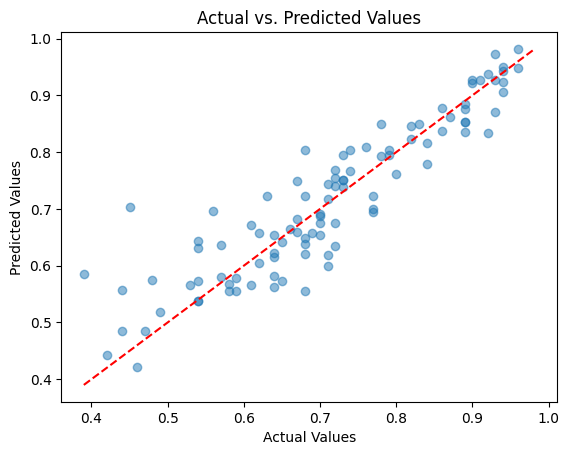

In [26]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, y_pred, alpha = 0.5)
min_val = min(min(Y_test), min(y_pred))
max_val = max(max(Y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

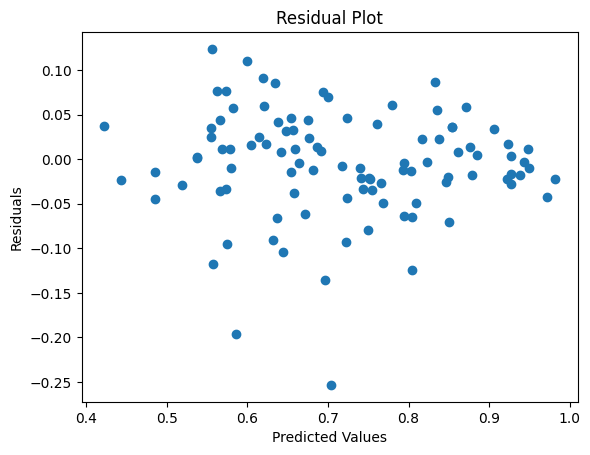

In [27]:
# Plot residuals
# Residuals are plotted against the predicted values of the target variable.
# Residual plot should show a random scatter of points around zero
plt.scatter(y_pred, Y_test - y_pred)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [28]:
import joblib
joblib.dump(model, "graduate_admission_model.joblib")

['graduate_admission_model.joblib']

### Dataset Citation

This notebook uses the Graduate Admissions Dataset available at [Kaggle](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions).

**Citation**:  
Mohan S Acharya, Asfia Armaan, Aneeta S Antony.  
*A Comparison of Regression Models for Prediction of Graduate Admissions*.  
IEEE International Conference on Computational Intelligence in Data Science, 2019.
